# Pi day

Consider this integral:

In [14]:
Integrate[Exp[-(x^2+y^2)],{x,-Infinity,Infinity},{y,-Infinity,Infinity}]

Pi

Cool, right? So I figure I can calculate $\pi$ by randomly choosing locations and seeing if they're under this plot:

-Graphics3D-
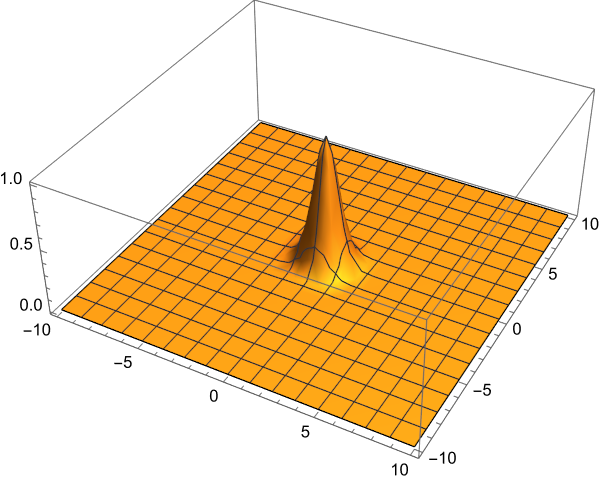

In [16]:
Plot3D[Exp[-(x^2+y^2)],{x,-10,10},{y,-10,10},PlotRange->All]

Consider the volume of space between z=0 and z=1. If you let x and y go to $\pm \infty$ that volume is infinite. However, the volue under the curve above is just $\pi$.

So what I think we can do is use a Monte Carlo technique to discover the volume under that curve. We can randomly select a point in the space between z=0 and z=1 and find the number under the curve vs the total number to get an estimate of $\pi$. The problem is the infinity part. Looking at the curve above, maybe we can limit ourselves to $\pm 10$. Let's see what that integral is:

In [43]:
Integrate[Exp[-(x^2+y^2)],{x,-10,10},{y,-10,10.}]

3.14159

Seems pretty good to me. Actually here's a plot of setting those bounds bigger and bigger with an asymptote drawn at $\pi$:

-Graphics-
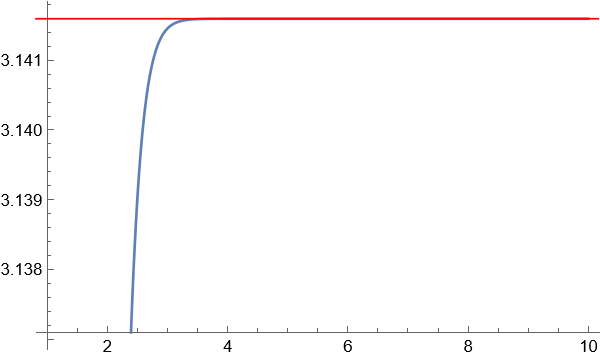

In [47]:
Plot[Evaluate[Integrate[Exp[-(x^2+y^2)],{x,-a,a},{y,-a,a}]],{a,1,10},Epilog->{Red,InfiniteLine[{0,Pi},{1,0}]}]

Ok, maybe 5 is far enough. Here's that same plot (with $\pi$ subtracted) from 5 to 10

-Graphics-
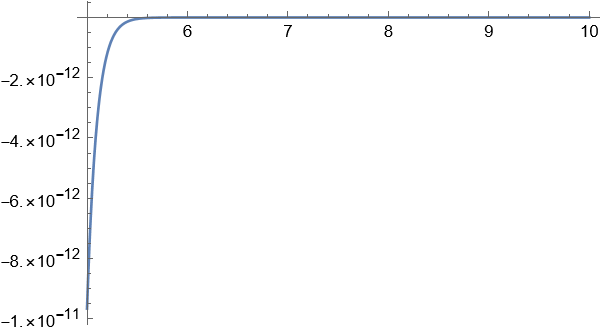

In [57]:
Plot[Evaluate[Integrate[Exp[-(x^2+y^2)],{x,-a,a},{y,-a,a}]-Pi],{a,5,10}]

Here's the 3D Plot again with limits of 5:

-Graphics3D-
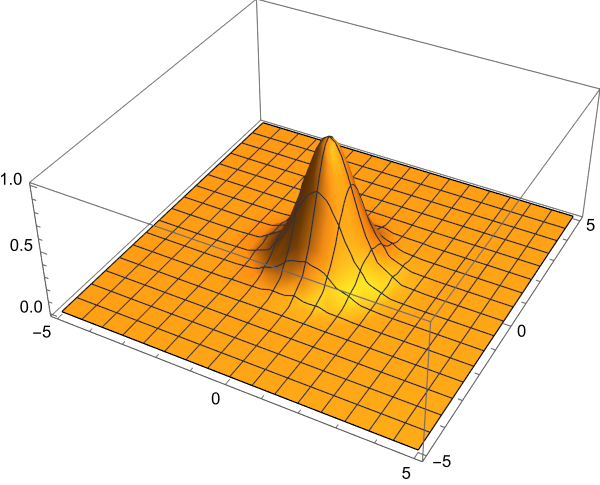

In [69]:
Plot3D[Exp[-(x^2+y^2)],{x,-5,5},{y,-5,5},PlotRange->All]

So it seems that to 12 digits of precision 5 is close enough.

Ok, that means instead of an infinite volume to consider, we'll have a $(2\times 5)\times(2\times 5)\times 1$ volume or 100 units. Essentially we expect:

$\frac{\text{points under}}{\text{all points}}=\frac{\pi}{100}$

or our estimate of $\pi$ to be 

$100\times\frac{\text{points under}}{\text{all points}}$.

So first we'll see how to randomly select one point in that region:

In [58]:
list=Join[RandomReal[{-5,5},2],RandomReal[{0,1},1]]

{-1.12113, 4.85579, 0.302354}

and now learn how to make a bunch of them:

In [66]:
bigList=Table[Join[RandomReal[{-5,5},2],RandomReal[{0,1},1]],{10^7}];

and then build a test (and test it) to see if a point is under the curve:

In [21]:
under[{x_,y_,z_}]:=z<Exp[-(x^2+y^2)];
under[list]

False

In [67]:
Length[Select[bigList,under]]/Length[bigList] 100.

3.13615

Not bad!